In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss=tf.losses.sparse_categorical_crossentropy)

In [4]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2950
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1511
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1168
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0975
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0847
313/313 - 0s - loss: 0.1136 - 442ms/epoch - 1ms/step


0.11360415071249008

In [5]:
# Print Total / Error Counts
predicted = model.predict(x_test)
total_count = predicted.shape[0]
error_index_list = []

for i in range(total_count):
    expect = np.argmax(predicted[i])
    actual = y_test[i]
    if expect != actual:
        error_index_list.append(i)
print(f"total: {total_count}, error: {len(error_index_list)}")

313/313 [==============================] - 0s 845us/step
total: 10000, error: 324


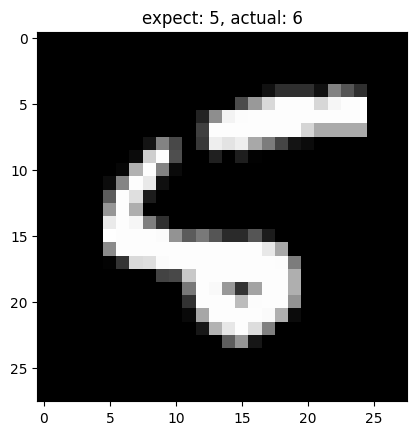

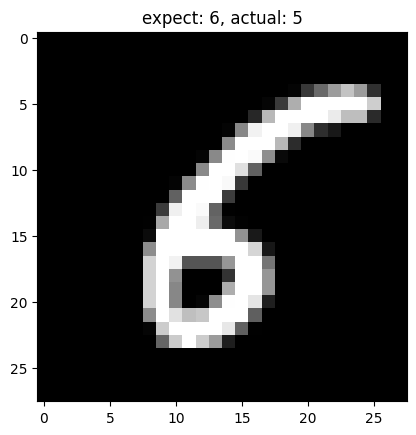

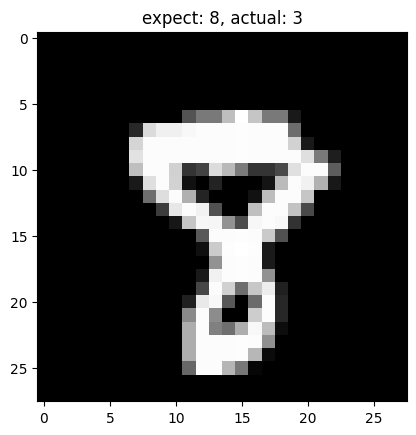

In [6]:
# Print Errors 
for index in error_index_list[0:3]: 
    first_image = np.array(x_test[index], dtype='float')
    plt.imshow(first_image, cmap='gray')
    plt.title(f"expect: {y_test[index]}, actual: {np.argmax(predicted[index])}")
    plt.show()